# Données SLAVACO

*Version du 02/12/2021*



Principale question explorée : influence des industriels

- la question de l'influence des intérêts des industriels du médicament est récurrent sur les débats publics autour de l'innovation médicale et du système de santé. En particulier quand on parle de science et de recherche (par ex. enquête de Bauer, Dubois)
- importance de définir plus concrètement ce qu'est l'influence des industriels et les facteurs qui tendent à les mobiliser
- enquête SLAVACO permet un échantillon super original 
- Trois questions qui rentrent dans cette perspective :
 - confiance industriels :  
   - 'Q45_G': 'Avez-vous confiance ou pas confiance dans les grandes entreprises ?',
 - intérêts financiers et économiques sur la science :  
   - 'Q19_': 'A votre avis, les facteurs suivants sont-ils responsables des désaccords entre scientifiques ? C’est parce que certains sont influencés par des intérêts financiers ou économiques',
 - **influence des industriels sur le gouvernement** (principal question explorée)  
   - 'Q20': 'Depuis le début de l’épidémie de COVID-19, le gouvernement a pris un certain nombre de mesures et fait un certain nombre de recommandations pour lutter contre ce virus.Pensez-vous que dans certains cas le gouvernement a suivi l’intérêt des industr'
   
**Principaux résultats**

- Plus d'un tiers qui pensent qu'il y a un effet fort sur le gouvernement
- Environ deux tiers qui pensent que c'est un facteur fort de controverses scientifiques
- Confiance partagée des répondants sur les industriels

à développer


**Principales questions en suspens**

- Comment exploiter les données quali ? Juste un codage et les principaux thèmes qui apparaissent?
- Que faire de la relation avec HC et vaccination ? Souligner l'interdépendance de ces thématiques

## Chargement des bibliothèques

In [1]:
import pandas as pd
import pyreadstat
import pyshs
import matplotlib.pyplot as plt

def labels(x,meta):
    return meta.value_labels[meta.variable_to_label[x]]

## Recodage des variables

In [58]:
# Attention, codages à vérifier avant diffusion

data, meta = pyreadstat.read_sav('./SLAVACO - Vague 2/SLAVACOv2_CAWI_COMPLET+POIDS_CORR.sav')

data["weight"] = data["poids_redresses_stand"]
data["sexe"] = data["Q02"].replace({1:"1-Man",2:"2-Woman",3:"3-Other"})
data["age"] = data["Q01_R0"].replace({1.0: '18-24',2.0: '25-34',3.0: '35-49',
                                      4.0: '50-64',5.0: '65-74',6.0: '75plus'})
data["csp"] = data["Q05_R0"].replace(labels("Q05_R0",meta))
reco = {1:"1 - inf bac",2:"1 - inf bac",3:"1 - inf bac",4:"1 - inf bac",
        5:"1 - inf bac", 6:"1 - inf bac",7:"2 - bac",
        8:"3 - sup bac",9:"3 - sup bac",10:"3 - sup bac",11:"3 - sup bac",
        12:"4 - sup M2",13:"4 - sup M2",14:"4 - sup M2"}
data["diplome"] = data["Q06"].replace(reco)
reco = {1.0: '1 - 0-1000€',2.0: '2 - 1000-2000€',
        3.0: '2 - 1000-2000€',4.0: '3 - 2000-4000€',
        5.0: '3 - 2000-4000€',6.0: '4 - 4000€ and more',99: '5 - NA'}
data["revenus"] = data["Q07"].replace(reco)
reco = {1.0: '5 - Extrême gauche', 2.0: '5 - Extrême gauche', 3.0: '5 - Extrême gauche', 4.0: '5 - Extrême gauche',
 5.0: '3 - Gauche', 6.0: '3 - Gauche', 7.0: '3 - Gauche',
 8.0: '1 - Centre', 9.0: '1 - Centre', 10.0: '1 - Centre', 11.0: '1 - Centre',
 12.0: '4 - Droite', 13.0: '4 - Droite',
 14.0: '6 - Extrême droite', 15.0: '6 - Extrême droite', 16.0: '6 - Extrême droite', 17.0: '6 - Extrême droite',
 18.0: '2 - Aucune formation politique',
 19.0: '7 - Une autre formation politique',99:"Ne souhaite pas répondre"}
data["orientation_politique"] = data["Q08_A"].replace(reco)
reco = {1.0: '1-Catholique',
 2.0: '2-Protestant ou évangélique',
 3.0: '3-Musulman',
 4.0: '4-Juif',
 5.0: '5-Autre religion',
 6.0: '6-Sans religion',
 99.0: '7-Vous ne souhaitez pas répondre'}
data["religion"] = data["Q11"].replace(reco)
data["couple"] = data["Q12"].replace({1.0: '1-Oui',2.0: '2-Non',98.0: '3-Vous ne savez pas',99.0: '4-Vous ne souhaitez pas répondre'})
data["enfants"] = data["Q13"].replace({1.0: '1-Oui', 2.0: '2-Non',3.0: '3-Vous attendez un enfant ou essayez d’en avoir un'})
data["inquietude_covid"] = data['Q15_B']
data["souffert_covid"] = data['Q16'].apply(lambda x : "1-Oui" if x>5 else "2-Non")
reco = {1.0: 'Confiance',
 2.0: 'Confiance',
 3.0: 'Pas confiance',
 4.0: 'Pas confiance',
 98.0: 'Vous ne savez pas',
 99.0: 'Vous ne souhaitez pas répondre'}
data["confiance_gouv"] = data["Q18"].replace(reco)

reco = {1:1,2:1,3:0,4:0,5:0}
data["politisation"] = data["Q40"].replace(reco) + data["Q41"].replace(reco) + data["Q42"].replace(reco) 
data["politisationC"]  = data["politisation"].replace({3:"3 - High",2:"2 - Average",1:"1 - Low",0:"1 - Low"})

reco = {1:1,2:1,3:0,4:0,98:0}
data["ind_confiance"] = (data[["Q45_%s"%i for i in "ABCJEFGHIJ"]].replace(reco).sum(axis=1)/(10*1))
data["ind_confianceC"] = pd.qcut(data["ind_confiance"],[0,0.25,0.5,0.75,1],["Q1 - Low","Q2","Q3","Q4 - High"])

reco = {1.0: '1-Beaucoup', 2.0: '2-Assez', 3.0: '3-Peu', 4.0: '4-Pas du tout'}
data["interet_science"] = data["Q47"].replace(reco)

reco = {1.0: '1-Plus de bien que de mal', 2.0: '2-Plus de mal que de bien',
 3.0: '3-A peu près autant de bien que de mal',98.0: '4-Vous ne savez pas',
 99.0: '5-Vous ne souhaitez pas répondre'}
data["apport_science"] = data["Q48"].replace(reco)

reco = {1.0: '1-La télévision',
 2.0: '2-La radio',
 3.0: '3-La presse écrite imprimée',
 4.0: '4-Les sites de médias sur Internet ou leur compte Twitter',
 5.0: '5-D’autres sites Internet',
 6.0: '6-Les réseaux sociaux (Facebook, Twitter, etc.)'}
data["media1"] = data['Q10M1'].replace(reco)
data["media2"] = data['Q10M2'].replace(reco)
data["media3"] = data['Q10M3'].replace(reco)

data["vaccin_general"] = data['Q24'].replace({1:"1-Favorable",2:"1-Favorable",
                                              3:"2-Défavorable",4:"2-Défavorable",
                                              98:"3-NA",99:"3-NA"})

# Conflits d'intérêt
reco = {1.0: '1 - Jamais',
 2.0: '2 - Rarement',
 3.0: '3 - Parfois',
 4.0: '4 - Souvent',
 5.0: '5 - Très souvent',
 98.0: '6 - Vous ne savez pas'}
data["industriels_influence_gouv_full"] = data["Q20"].replace(reco)
data["industriels_influence_gouv_fort"] = data["Q20"].replace({5:1,4:1,3:0,2:0,1:0,98:0})
reco = {1:"1-Jamais ou rarement",2:"1-Jamais ou rarement",3:"2-Parfois",
        4:"3-Souvent ou Très Souvent",5:"3-Souvent ou Très Souvent",98:"4-NSP",98:"6-NSP"}
data["industriels_influence_gouv"] = data['Q20'].replace(reco)
data["economie_influence_science"] = data['Q19_'].replace(reco)
data["economie_influence_science_fort"] = data['Q19_'].replace({5:1,4:1,3:0,2:0,1:0,98:0,6:0})

data["confiance_industriels"] = data["Q45_G"].replace({1:"1 - Oui",2:"1 - Oui",
                                                       3:"2 - Non",4:"2 - Non",98:"3 - NSP"})
 
# HC
reco = {1:"1-HC efficace",2:"2-HC pas efficace",3:"3-Incertitude",98:"NSP"}
data["HC"] = data["Q21"].replace(reco)

# Rapport au gouv.
data['Q20_PRE'] = data['Q20_PRE'].replace("","NA")
data["REP"] = data['Q20_PRE'].apply(lambda x: "No" if x=="NA" else "Yes")
data["REP_len"] = data['Q20_PRE'].apply(lambda x: None if x=="NA" else len(x))

In [61]:
#meta.column_names_to_labels

Variables indépendantes

In [50]:
var_ind1 = {"sexe":"Genre","age":"Age","csp":"Profession","revenus":"Revenus",
           "diplome":"Diplome","souffert_covid":"Impact COVID"}
var_ind2 = {"orientation_politique":"Orientation politique","politisationC":"Politicisation",
          "media1":"Principal média","confiance_gouv":"Confiance gouvernement",
           "ind_confianceC":"Confiance"}

#data[["sexe","age","csp","revenus","orientation_politique","diplome",
#      "media1","media2","media3","ind_confiance","politisationC","HC"]]

### Distributions

In [32]:
pyshs.tri_a_plat(data,"industriels_influence_gouv","poids_redresses_stand")

,Effectif redressé,Pourcentage (%)
1-Jamais ou rarement,482.0,23.9
2-Parfois,497.4,24.7
3-Souvent ou Très Souvent,629.4,31.2
6-NSP,406.1,20.2
Total,2014.9,100.0


Plus d'un tiers pensent que cet effet est fort

In [30]:
pyshs.tri_a_plat(data,"confiance_industriels","poids_redresses_stand")

,Effectif redressé,Pourcentage (%)
1 - Oui,858.8,42.6
2 - Non,965.0,47.9
3 - NSP,191.2,9.5
Total,2015.0,100.0


Confiance divisée sur les industriels

In [31]:
pyshs.tri_a_plat(data,"economie_influence_science","poids_redresses_stand")

,Effectif redressé,Pourcentage (%)
1-Jamais ou rarement,165.8,8.2
2-Parfois,442.1,21.9
3-Souvent ou Très Souvent,1217.8,60.4
6.0,189.3,9.4
Total,2015.0,99.9


+ un profil différent des autres facteurs, éventuellement à préciser

#### Analyse du champ ouvert

In [14]:
data["REP_content"] = data["REP_len"]>10
pyshs.tableau_croise(data,"gouv_indus","REP_content")

,False,True,Total
1-Jamais,207.0 (100.0%),0.0 (0.0%),207 (100%)
2-Rarement,206.0 (74.9%),69.0 (25.1%),275 (100%)
3-Parfois,330.0 (65.6%),173.0 (34.4%),503 (100%)
4-Souvent ou Très Souvent,317.0 (50.1%),316.0 (49.9%),633 (100%)
5-NSP,397.0 (100.0%),0.0 (0.0%),397 (100%)
Total,1457.0 (72.3%),558.0 (27.7%),2015 (100%)


Plus les gens pensent qu'il y a un effet, plus ils ont tendance à répondre au champ ouvert de plus de 10 lettres...

<AxesSubplot:ylabel='Frequency'>

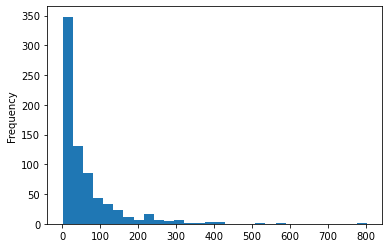

In [45]:
data["REP_len"].plot(kind="hist",bins=30)

Ecriture dans un fichier

In [ ]:
data[data['Q20_PRE']!="NA"]['Q20_PRE'].to_excel("champ_libre_Q20.xls")

### Quelques croisements

Lien HC / gouvernement sous influence

In [33]:
pyshs.tableau_croise(data,"industriels_influence_gouv","HC","weight")

,1-HC efficace,2-HC pas efficace,3-Incertitude,NSP,Total
1-Jamais ou rarement,35.9 (7.4%),200.2 (41.5%),146.4 (30.4%),99.5 (20.6%),482.0 (100%)
2-Parfois,44.3 (8.9%),113.2 (22.8%),169.9 (34.2%),170.0 (34.2%),497.4 (100%)
3-Souvent ou Très Souvent,189.7 (30.1%),41.5 (6.6%),212.4 (33.7%),185.8 (29.5%),629.4 (100%)
6-NSP,21.3 (5.2%),55.3 (13.6%),115.9 (28.5%),213.6 (52.6%),406.1 (100%)
Total,291.3 (14.5%),410.2 (20.4%),644.6 (32.0%),668.9 (33.2%),2015.0 (100%)


Lien vaccins / gouvernement sous influence

In [38]:
pyshs.tableau_croise(data,"industriels_influence_gouv","vaccin_general","weight")

,1-Favorable,2-Défavorable,3-NA,Total
1-Jamais ou rarement,411.1 (85.3%),57.4 (11.9%),13.6 (2.8%),482.0 (100%)
2-Parfois,407.1 (81.8%),63.4 (12.7%),27.0 (5.4%),497.4 (100%)
3-Souvent ou Très Souvent,415.3 (66.0%),180.5 (28.7%),33.7 (5.4%),629.4 (100%)
6-NSP,289.1 (71.2%),57.5 (14.2%),59.6 (14.7%),406.1 (100%)
Total,1522.5 (75.6%),358.6 (17.8%),133.8 (6.6%),2015.0 (100%)


Lien très fort avec les certitudes de santé & les comportements complotistes

In [48]:
pyshs.tableau_croise_multiple(data,"industriels_influence_gouv",var_ind1,weight="weight")

1-Jamais ou rarement  \
Variable                 Modalités                                                                
Genre (p = 0.000)        1-Man                                                    265.4 (27.7%)   
                         2-Woman                                                  215.1 (20.4%)   
                         3-Other                                                   1.6 (100.0%)   
                         Total                                                    482.0 (23.9%)   
Age (p = 0.004)          18-24                                                     51.0 (24.6%)   
                         25-34                                                     63.8 (21.6%)   
                         35-49                                                    107.0 (22.0%)   
                         50-64                                                    108.1 (22.0%)   
                         65-74                                                     84.0 (29.0%)   
                         75plus                                                    68.1 (27.6%)   
                         Total                                                    482.0 (23.9%)   
Profession (p = 0.000)   Agriculteurs                                               2.6 (18.7%)   
                         Artisans, commerçants ou chefs d'entreprise               21.4 (29.7%)   
                         Autres personnes sans activité professionnelle            58.0 (23.7%)   
                         Cadres ou professions intellectuelles supérieures         65.2 (30.2%)   
                         Employés                                                  49.3 (17.1%)   
                         Ouvriers                                                  42.3 (19.1%)   
                         Professions Intermédiaires                                66.5 (23.8%)   
                         Retraités                                                176.6 (26.0%)   
                         Total                                                    482.0 (23.9%)   
Revenus (p = 0.000)      1 - 0-1000€                                               31.2 (19.9%)   
                         2 - 1000-2000€                                           115.9 (21.0%)   
                         3 - 2000-4000€                                           208.3 (25.6%)   
                         4 - 4000€ and more                                        85.9 (34.2%)   
                         5 - NA                                                    40.7 (16.9%)   
                         Total                                                    482.0 (23.9%)   
Diplome (p = 0.000)      1 - inf bac                                              209.1 (19.6%)   
                         2 - bac                                                   46.9 (25.3%)   
                         3 - sup bac                                              149.3 (27.4%)   
                         4 - sup M2                                                76.7 (35.5%)   
                         Total                                                    482.0 (23.9%)   
Impact COVID (p = 0.013) 1-Oui                                                    234.3 (21.5%)   
                         2-Non                                                    247.7 (26.8%)   
                         Total                                                    482.0 (23.9%)   

                                                                                2-Parfois  \
Variable                 Modalités                                                          
Genre (p = 0.000)        1-Man                                              250.9 (26.2%)   
                         2-Woman                                            246.5 (23.3%)   
                         3-Other                                               0.0 (0.0%)   
                         Total               

In [51]:
pyshs.tableau_croise_multiple(data,"industriels_influence_gouv",var_ind2,weight="weight")

1-Jamais ou rarement  \
Variable                           Modalités                                                                 
Orientation politique (p = 0.000)  1 - Centre                                                139.5 (50.8%)   
                                   2 - Aucune formation politique                            118.3 (17.0%)   
                                   3 - Gauche                                                 77.3 (22.9%)   
                                   4 - Droite                                                 54.0 (25.6%)   
                                   5 - Extrême gauche                                         46.8 (26.9%)   
                                   6 - Extrême droite                                         33.3 (12.5%)   
                                   7 - Une autre formation politique                          12.8 (24.5%)   
                                   Total                                                     482.0 (23.9%)   
Politicisation (p = 0.000)         1 - Low                                                   156.1 (17.3%)   
                                   2 - Average                                                85.0 (24.2%)   
                                   3 - High                                                  240.9 (31.6%)   
                                   Total                                                     482.0 (23.9%)   
Principal média (p = 0.000)        1-La télévision                                           223.7 (23.1%)   
                                   2-La radio                                                 82.9 (24.1%)   
                                   3-La presse écrite imprimée                                54.4 (32.8%)   
                                   4-Les sites de médias sur Internet ou leur comp...         71.0 (27.2%)   
                                   5-D’autres sites Internet                                  29.5 (18.3%)   
                                   6-Les réseaux sociaux (Facebook, Twitter, etc.)            20.5 (17.7%)   
                                   Total                                                     482.0 (23.9%)   
Confiance gouvernement (p = 0.000) Confiance                                                 377.1 (40.8%)   
                                   Pas confiance                                              96.8 (10.1%)   
                                   Vous ne savez pas                                            6.1 (6.2%)   
                                   Vous ne souhaitez pas répondre                               2.0 (5.6%)   
                                   Total                                                     482.0 (23.9%)   
Confiance (p = 0.000)              Q1 - Low                                                   87.1 (12.8%)   
                                   Q2                                                         64.1 (14.8%)   
                                   Q3                                                        178.2 (32.0%)   
                                   Q4 - High                                                 152.5 (44.4%)   
                                   Total                                                     482.0 (23.9%)   

                                                                                           2-Parfois  \
Variable                           Modalités                                                           
Orientation politique (p = 0.000)  1 - Centre                                           72.9 (26.6%)   
                                   2 - Aucune formation politique                      167.1 (23.9%)   
                                   3 - Gauche                                           92.2 (27.3%)   
                                   4 - Droite                                           71.5 (33.9%)   
                                   5 - Extrême gauc

Lien fort avec la confiance

### Modèle de régression logistique

Les facteurs associés à penser qu'il y a un effet fort sur le gouvernement

In [59]:
pyshs.tri_a_plat(data,"economie_influence_science_fort")

,Effectif,Pourcentage (%)
0.0,791.0,39.3
1.0,1224.0,60.7
Total,2015.0,100.0


In [60]:
var_ind = {"sexe":"1-Sexe","age":"2-Age","diplome":"3-diplome","revenus":"4-Revenus",
           "orientation_politique":"5-Orientation politique","politisationC":"6-Politisation",
          "ind_confianceC":"7-Confiance"}

t = { "Industriels influence gouvernement":pyshs.regression_logistique(data,"industriels_influence_gouv_fort",
                                                       var_ind,weight="weight"),
      "Économiue influence scientifiques":pyshs.regression_logistique(data,"economie_influence_science_fort",
                                                       var_ind,weight="weight")
}
pd.concat(t,axis=1)

/Users/emilien/anaconda3/envs/p37/lib/python3.7/site-packages/pyshs.py:430: RuntimeWarning: overflow encountered in exp
  table = np.exp(regression.conf_int())
/Users/emilien/anaconda3/envs/p37/lib/python3.7/site-packages/pyshs.py:430: RuntimeWarning: overflow encountered in exp
  table = np.exp(regression.conf_int())


Industriels influence gouvernement  \
                                                                                  Odds Ratio   
Variable                Modalité                                                               
.Intercept                                                                              0.11   
1-Sexe                  1-Man                                                            ref   
                        2-Woman                                                         1.14   
                        3-Other                                                            0   
2-Age                   18-24                                                            ref   
                        25-34                                                           1.51   
                        35-49                                                           1.18   
                        50-64                                                            1.2   
                        65-74                                                           0.97   
                        75plus                                                          0.75   
3-diplome               1 - inf bac                                                      ref   
                        2 - bac                                                         0.94   
                        3 - sup bac                                                     0.89   
                        4 - sup M2                                                      0.85   
4-Revenus               1 - 0-1000€                                                      ref   
                        2 - 1000-2000€                                                  1.43   
                        3 - 2000-4000€                                                  1.44   
                        4 - 4000€ and more                                              1.02   
                        5 - NA                                                          1.13   
5-Orientation politique 1 - Centre                                                       ref   
                        2 - Aucune formation politique                                  4.03   
                        3 - Gauche                                                      4.62   
                        4 - Droite                                                      3.84   
                        5 - Extrême gauche                                                 7   
                        6 - Extrême droite                                              7.08   
                        7 - Une autre formation politique                               2.48   
6-Politisation          1 - Low                                                          ref   
                        2 - Average                                                     0.95   
                        3 - High                                                        1.48   
7-Confiance             Q1 - Low                                                         ref   
                        Q2                                                              0.69   
                        Q3                                                              0.38   
                        Q4 - High                                                       0.12   

                                                                    \
                                                                 p   
Variable                Modalité                                     
.Intercept                                                  0.0***   
1-Sexe                  1-Man                                        
                        2-Woman                              0.228   
                        3-Other                              0.999   
2-Age                   18-24                                        
                        25-34            

Encore une fois la confiance absorbe une partie importante de l'effet : est-ce qu'on la garde ?

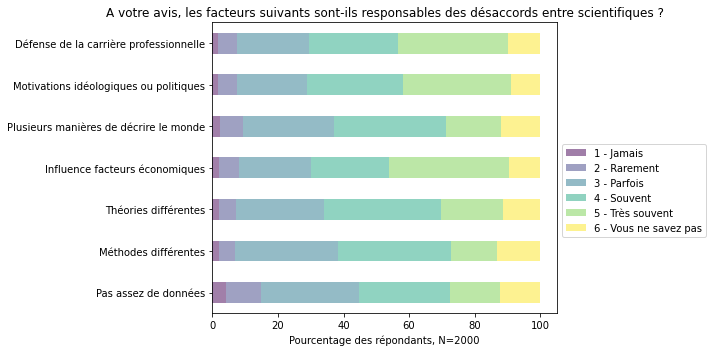

In [36]:
reco1 = {1.0: '1 - Jamais ou rarement', 2.0: '1 - Jamais ou rarement', 3.0: '2 - Parfois',
 4.0: '3 - Souvent', 5.0: '3 - Souvent', 6.0: '4 - Vous ne savez pas'}
reco2 = {1.0: '1 - Jamais', 2.0: '2 - Rarement', 3.0: '3 - Parfois',
 4.0: '4 - Souvent', 5.0: '5 - Très souvent', 6.0: '6 - Vous ne savez pas'}
raisons = {"Q19_A":"Pas assez de données","Q19_B":"Méthodes différentes","Q19_C":"Théories différentes",
          "Q19_":"Influence facteurs économiques","Q19_E":"Plusieurs manières de décrire le monde",
          "Q19_F":"Motivations idéologiques ou politiques","Q19_G":"Défense de la carrière professionnelle"}

d = [pyshs.tri_a_plat(data.replace(reco2),i,"poids_redresses_stand").drop("Total")["Pourcentage (%)"] for i in raisons]

pd.DataFrame(d,index=raisons.values()).plot(kind="barh",stacked=True,cmap="viridis",
            figsize=(10,5),alpha=0.5)
plt.legend(bbox_to_anchor=(1, 0.6))
plt.title("A votre avis, les facteurs suivants sont-ils responsables des désaccords entre scientifiques ?")
plt.xlabel("Pourcentage des répondants, N=2000")
plt.tight_layout()
#plt.savefig("désaccords.png",dpi=200,transparent=False,facecolor="white")

- ACM
- classification

In [34]:
pd.DataFrame(d,index=raisons.values())

,1 - Jamais,2 - Rarement,3 - Parfois,4 - Souvent,5 - Très souvent,6 - Vous ne savez pas
Pas assez de données,4.0,10.7,30.1,27.6,15.3,12.3
Méthodes différentes,2.0,5.0,31.2,34.7,14.0,13.0
Théories différentes,2.0,5.2,26.7,35.9,18.8,11.4
Influence facteurs économiques,1.9,6.3,21.9,23.7,36.7,9.4
Plusieurs manières de décrire le monde,2.2,7.0,28.0,34.1,16.8,11.9
Motivations idéologiques ou politiques,1.6,5.9,21.4,29.1,33.0,9.0
Défense de la carrière professionnelle,1.8,5.7,22.1,27.0,33.5,9.9
